# Introducción al Machine Learning

https://github.com/guipsamora/awesome-datascience

## Tipos de machine learning
- Supervised learning
- Unsupervised learning
- Reinforcement learning

https://d2mjco6wb7ylug.cloudfront.net/9781786463661-KNOW-ABOUT-MACHINE-LEARNING/What%20You%20Need%20to%20Know%20about%20Machine%20Learning%20%5BeBook%5D.pdf?Expires=1552257222&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9kMm1qY282d2I3eWx1Zy5jbG91ZGZyb250Lm5ldC85NzgxNzg2NDYzNjYxLUtOT1ctQUJPVVQtTUFDSElORS1MRUFSTklORy9XaGF0JTIwWW91JTIwTmVlZCUyMHRvJTIwS25vdyUyMGFib3V0JTIwTWFjaGluZSUyMExlYXJuaW5nJTIwJTVCZUJvb2slNUQucGRmIiwiQ29uZGl0aW9uIjp7IkRhdGVMZXNzVGhhbiI6eyJBV1M6RXBvY2hUaW1lIjoxNTUyMjU3MjIyfX19XX0_&Signature=QNKgQhPWB45e2UgCpax4xCFxNRa9jp~M-INGNc6ItA65UgJrC4cwCMRz6llidpFI14St5-qlXBrnjZJjmPLme0eDa-s9zusyC9EDe-TErQIHaO~rDSV0d3-7Va-dQICTmMyrN8j750nWEhTIyCQaUpdSdJzVRIEQ6-RHm1DNgYY_&Key-Pair-Id=APKAJTJLPJQL5PVZ47FA

https://ugoproto.github.io/ugo_py_doc/super-cheatsheet-machine-learning.pdf

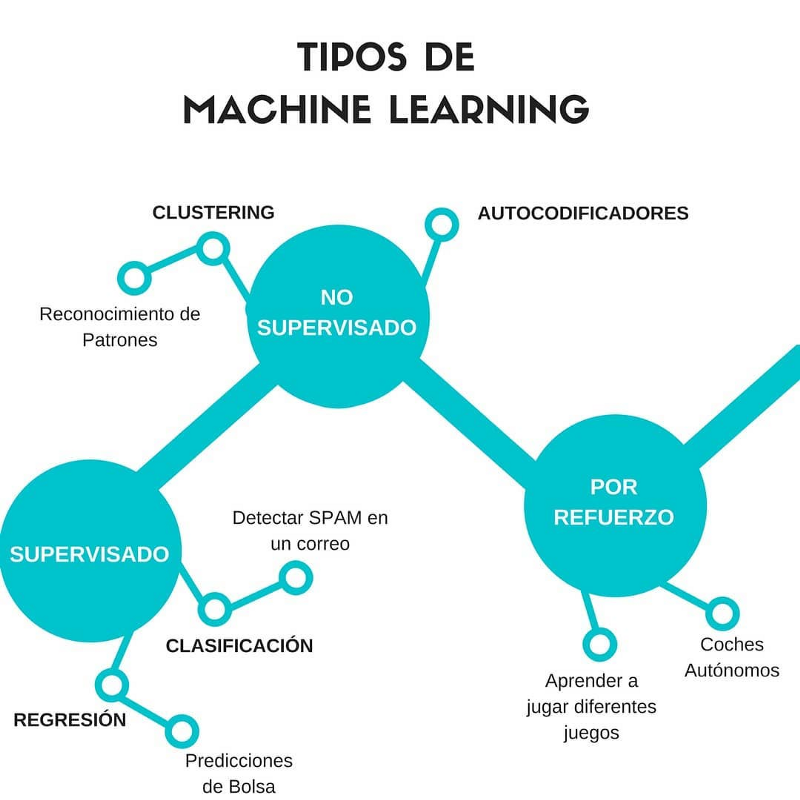

[Ref1](https://medium.com/ai-learners/ai-en-3-minutos-tipos-de-machine-learning-945b708ac78)
[Ref2](https://medium.com/@juanzambrano/aprendizaje-supervisado-o-no-supervisado-39ccf1fd6e7b)

## Preparación de los datos

- Cuando trabajamos en un problema de clasificación debemos prevenir problemas como el overfitting
- Para ello, muchos investigadores dividen su conjunto de datos en dos subconjuntos: entrenamiento y validación
- Sin embargo, esto es, en general, insuficiente para ajustar los parámetros del algoritmo de aprendizaje
- Una mejor aproximación sería dividir el conjunto de datos en: entrenamiento, validación y test

<img src="images/train_test.png" width="500" align="center">

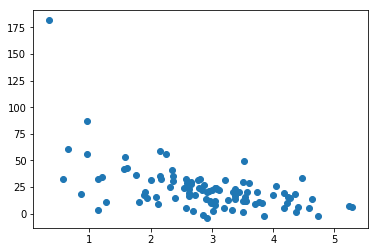

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

In [6]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

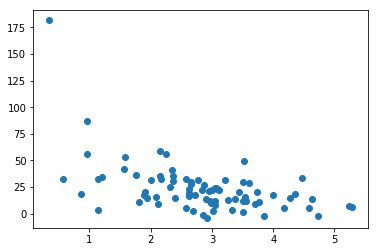

In [7]:
scatter(trainX, trainY)

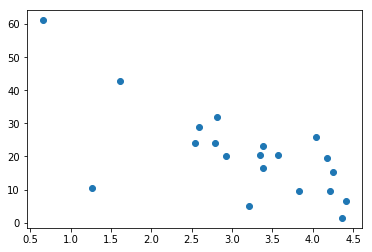

In [8]:
scatter(testX, testY)

### K-fold cross validation
Podemos modificar la fase de aprendizaje para disminuir la varianza del modelo
- División del conjunto de datos en k subconjuntos
- Cada subconjunto es considerado alternativamente como conjunto de validación mientras el resto forman el conjunto de aprendizaje
- Habitualmente, k=10
- En ocasiones, se puede repetir el proceso n veces y calcular la media de los resultados
    - Disminuimos aún más la varianza
- Estratificación: división en conjuntos con un número similar de instancias de cada posible etiqueta

#### Ejemplo

https://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/bonus/nested_cross_validation.ipynb

In [95]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)   

0.9666666666666667

In [98]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

print(f'Accuracy para cada fold: {scores}')
print(f'Accuracy medio para los 5 folds: {scores.mean()}')

Accuracy para cada fold: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Accuracy medio para los 5 folds: 0.9800000000000001


### Leave-One-Out 
- Caso extremo de CV
    - Cada instancia es un “fold”
    - En cada iteración se valida con una única instancia y se aprende con el resto
- Mejor uso de los datos
- Sólo recomendable si tenemos un dataset pequeño
- No es posible la estratificación
    - Casos degenerados pueden dar medidas de clasificación muy dispares

In [104]:
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)

for train_index, test_index in loo.split(X):
   print(f'\nTRAIN: {train_index} | TEST: {test_index}')
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)


TRAIN: [1] | TEST: [0]
[[3 4]] [[1 2]] [2] [1]

TRAIN: [0] | TEST: [1]
[[1 2]] [[3 4]] [1] [2]


## Desbalanceo de los datos

- Algunos datasets presentan grandes diferencias en el número de instancias de cada una de las clases
    - Ejemplo: clasificador que reconozca terroristas puede tener un 99.99% de precisión prediciendo la clase mayoritaria 
- Existen técnicas que intentan minimizar el efecto de este balanceo
    - Re-muestreando instancias
    - Asociando un peso (coste) distinto a predecir cada una de las clases

### Resampling
- Podemos considerar, básicamente, dos opciones para igualar el número de instancias de cada clase
    - Undersampling de la clase mayoritaria
    - Oversampling de la clase minoritaria
- Puede ser aleatorio o guiado por alguna medida
- El undersampling aleatorio puede eliminar instancias representativas del modelo real
- El oversampling aleatorio puede hacer que nuestro modelo incurra en overfitting
- Algunos autores proponen hacer el resampling de una manera más inteligente
    - Ejemplo: SMOTE

## Gestión de datos categóricos

En muchos problemas de clasificación, el conjunto de datos de destino está formado por etiquetas categóricas que no pueden procesarse inmediatamente con ningún algoritmo. 

#### LabelEncoder
- Funciona como un diccionario, asignando a cada valor categórico un número entero autoincremental
- Inconveniente: todas las etiquetas se convierten en números secuenciales. Un clasificador que trabaja con valores reales considerará números similares según su distancia, sin ninguna preocupación por la semántica.

In [28]:
import numpy as np

X = np.random.uniform(0.0, 1.0, size=(10, 2))
Y = np.random.choice(('Male','Female'), size=(10))

print(X[0])
print()
print(Y[0])


[0.89316619 0.82489048]

Male


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
yt = le.fit_transform(Y)
print(yt)
print()
print(le.classes_)

[1 1 0 0 0 1 0 1 1 0]

['Female' 'Male']


In [23]:
output = [1, 0, 1, 1, 0, 0]
decoded_output = [le.classes_[i] for i in output]
decoded_output

['Male', 'Female', 'Male', 'Male', 'Female', 'Female']

#### LabelBinarizer
- Funciona como un diccionario, asignando a cada valor categórico un valor en binario

In [30]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
Yb = lb.fit_transform(Y)
print(Yb.tolist())
print()
print(lb.inverse_transform(Yb))

[[1], [1], [1], [0], [0], [0], [1], [0], [0], [0]]

['Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Female'
 'Female']


#### DictVectorizer
- Las características categóricas cuando están estructurados como una lista de diccionarios (no necesariamente densos, solo pueden tener valores para algunas características).

In [32]:
from sklearn.feature_extraction import DictVectorizer, FeatureHasher

data = [
   { 'feature_1': 10.0, 'feature_2': 15.0 },
   { 'feature_1': -5.0, 'feature_3': 22.0 },
   { 'feature_3': -2.0, 'feature_4': 10.0 }
]

dv = DictVectorizer()
Y_dict = dv.fit_transform(data)

Y_dict.todense()


matrix([[10., 15.,  0.,  0.],
        [-5.,  0., 22.,  0.],
        [ 0.,  0., -2., 10.]])

#### OneHotEncoder
Cuando se trabaja con características categóricas (que normalmente se convierten en enteros positivos a través de LabelEncoder), también es posible filtrar el conjunto de datos para aplicar la codificación instantánea utilizando la clase OneHotEncoder.

In [2]:
from sklearn.preprocessing import OneHotEncoder

data = [
   [0, 10],
   [1, 11],
   [1, 8],
   [0, 12],
   [0, 15]
]

oh = OneHotEncoder(categorical_features=[0])
Y_oh = oh.fit_transform(data)

Y_oh.todense()

/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


matrix([[ 1.,  0., 10.],
        [ 0.,  1., 11.],
        [ 0.,  1.,  8.],
        [ 1.,  0., 12.],
        [ 1.,  0., 15.]])

### Bias - Variance tradeoff

### Overfitting - Underfitting
https://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/ch03/ch03.ipynb#Tackling-overfitting-via-regularization

### Data preprocessing
https://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb

How to Start with Supervised Learning (Take 1)
Approach supervised learning is the following:

- Perform an Exploratory Data Analysis (EDA) on a dataset;
- Build a quick and dirty model, or a baseline model, which can serve as a comparison against later models that we will build;
- Iterate this process. We will do more EDA and build another model;
- Engineer features: take the features that we already have and combine them or extract more information from them to eventually come to the last point, which is
- Get a model that performs better.


https://ugoproto.github.io/ugo_py_doc/EDA_Machine_Learning_Feature_Engineering_and_Kaggle/

## Métricas de evaluación
https://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/ch06/ch06.ipynb#Looking-at-different-performance-evaluation-metrics

### Confusion matrix
https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781786464392/2/ch02lvl1sec26/confusion-matrix

## Scikit-learn

https://scikit-learn.org/stable/datasets/

# Referencias
- [big_data_and_business_intelligence](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781785889622/3/ch03lvl1sec21/creating-training-and-test-sets)

### Ejemplos:
- https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781782161400/2/ch02lvl1sec14/the-iris-dataset
- https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781788295758/1/ch01lvl1sec8/statistical-terminology-for-model-building-and-validation


https://github.com/guipsamora/python-machine-learning-book

https://github.com/guipsamora/machinelearninginaction